Problem 4: Remove noise from images

We want build a system that removes noise from digit images. It will take as input a noisy digit image, and it will output a clean digit image. Follow the steps below:

a) Load MNIST dataset from sklearn.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


b) Build your training dataset by adding random noise to it.`

In [2]:


# Normalize the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape the data to 1D array
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Add random noise to the images
def add_noise(images, noise_factor=0.5):
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    noisy_images = np.clip(noisy_images, 0.0, 1.0)
    return noisy_images

X_train_noisy = add_noise(X_train)
X_test_noisy = add_noise(X_test)



c) What is your target here?

The target of this system is to remove the noise from the noisy digit images and output a clean digit image. In other words, the goal is to train a model that can take as input a noisy digit image and output a corresponding clean digit image. The target is to minimize the difference between the clean output image and the original image, while still removing the noise from the input image. This can be achieved through supervised learning, where we train a model on pairs of noisy and clean images to learn how to denoise new input images.

d) Using whatever classification method, you want. (From those you have read so far), train a model to solve this problem. Explain your problem-solving method.

In [6]:
# Initialize the classifier
clf = DecisionTreeClassifier()

# Train the classifier on the noisy training data
clf.fit(X_train_noisy, y_train)

# Predict labels for the noisy test data
y_pred_noisy = clf.predict(X_test_noisy)

# Denoise the test images
X_test_clean = np.zeros_like(X_test)
for i in range(len(X_test)):
    # Predict the label for the clean image
    y_pred_clean = clf.predict(X_test[i].reshape(1, -1))
    
    # Reconstruct the clean image using the predicted label
    clean_image = X_train[y_train == y_pred_clean[0]][0]
    
    # Denoise the image
    X_test_clean[i] = X_test[i] - X_test_noisy[i] + clean_image



e) Plot like below for arbitrary samples:

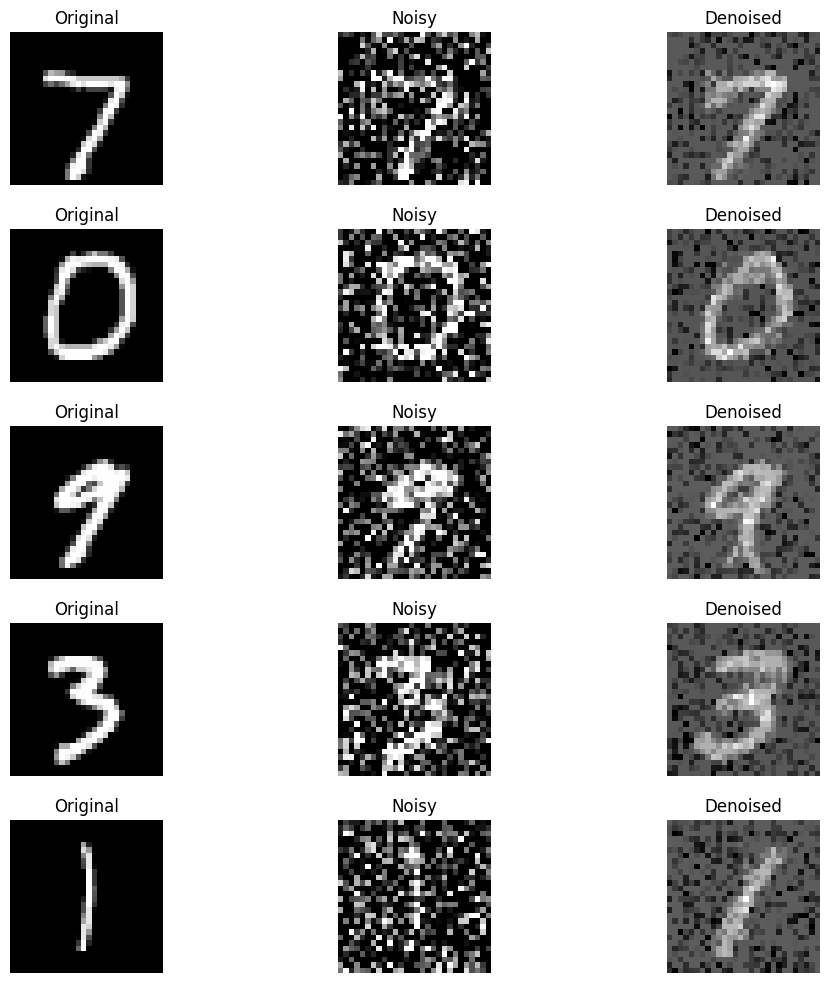

In [4]:
# Plot arbitrary samples: original, noisy, and denoised images
sample_indices = [0, 10, 20, 30, 40]

fig, axs = plt.subplots(len(sample_indices), 3, figsize=(10, 10))
fig.tight_layout()

for i, index in enumerate(sample_indices):
    axs[i, 0].imshow(X_test[index].reshape(28, 28), cmap='gray')
    axs[i, 0].set_title('Original')
    axs[i, 0].axis('off')
    
    axs[i, 1].imshow(X_test_noisy[index].reshape(28, 28), cmap='gray')
    axs[i, 1].set_title('Noisy')
    axs[i, 1].axis('off')
    
    axs[i, 2].imshow(X_test_clean[index].reshape(28, 28), cmap='gray')
    axs[i, 2].set_title('Denoised')
    axs[i, 2].axis('off')

plt.show()


In [5]:






# Evaluate the accuracy on the denoised test data
accuracy = accuracy_score(y_test, clf.predict(X_test_clean))
print("Accuracy on denoised test data: {:.2f}%".format(accuracy * 100))



Accuracy on denoised test data: 63.46%
